## Question 1, section 4

In [1]:
import numpy as np
from scipy.stats import norm
l0 = 1
n = 20
N = 1000000
alpha = 0.05
wald = lambda X: np.sqrt(n)*(np.average(X) - l0)/np.sqrt(np.average(X))
threshold = np.abs(norm.interval(1-alpha)[0])

In [2]:
rejected = 0
for i in range(N):
    X = np.random.poisson(l0, n)
    w = wald(X)
    rejected += np.abs(w) > threshold
print("Rejected {}% of times".format(100*rejected/N))

Rejected 5.277% of times


## Question 2, section 1

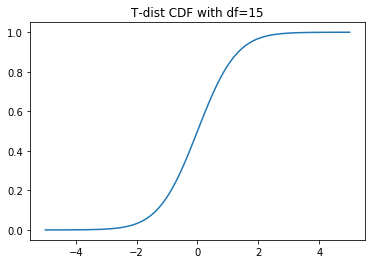

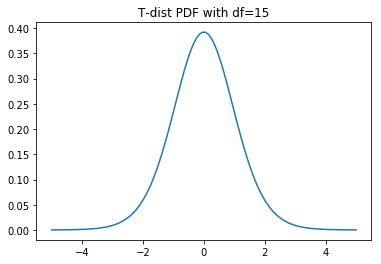

In [4]:
from scipy.stats import t
from matplotlib import pyplot as plt
x = np.linspace(-5, 5, 100)
plt.figure()
plt.plot(x, t.cdf(x, df=15))
plt.title("T-dist CDF with df=15")
plt.figure()
plt.title("T-dist PDF with df=15")
plt.plot(x, t.pdf(x, df=15))
plt.show()

In [5]:
t.cdf(0, df=15)

0.5

## Question 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from mpl_toolkits.mplot3d import axes3d, Axes3D

df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data', 
    header=None, 
    sep=',')
df = df.T

In [2]:
# 1 + 2
tags = np.array(df.iloc[-1,:])
classes = np.unique(tags)
data = df.iloc[:-1,:].values.astype('float')

print("Num of features: %d" %data.shape[0])
print("Num of samples: %d" %data.shape[1])
print("Classes: %s" % classes)

Num of features: 60
Num of samples: 208
Classes: ['M' 'R']


In [18]:
# Preprocessing
data = data - data.mean(axis=1, keepdims=True)
data = data / np.sqrt(data.shape[1]-1)

In [5]:
# SVD
u,s,v = np.linalg.svd(data)
p = u.T@ data # TODO: change
eig_vectors = u
eig_values = np.square(s)

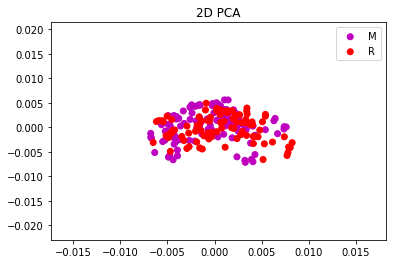

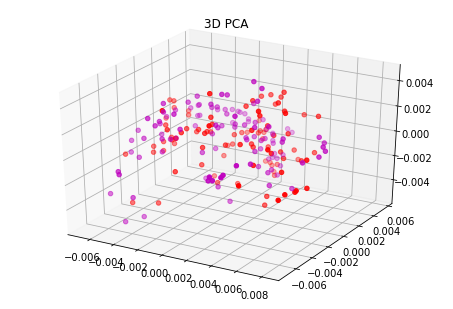

In [7]:
# 3
plt.figure()
for tag in classes:
    indexes = tags == tag
    plt.scatter(p[0,indexes], p[1,indexes], c=tags[indexes], label=tag)
plt.legend()
plt.title('2D PCA')
plt.show()

fig = plt.figure();
ax = Axes3D(fig)
plt.title('3D PCA')
for tag in classes:
    indexes = tags == tag
    ax.scatter(p[0,indexes], p[1,indexes], p[2, indexes], c=tags[indexes], label=tag)
plt.show()

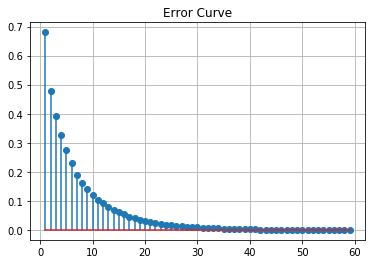

In [11]:
# 4 - Error curve
data_norm = np.linalg.norm(data, ord='fro')
errors = []
for i in range(1, data.shape[0]):
    W = eig_vectors[:,:i]
    diff = ((np.linalg.pinv(W)).T).dot((W.T).dot(data))-data
    error = np.square(np.linalg.norm(diff,ord='fro')/data_norm)
    errors.append(error)
plt.figure()
plt.grid()
plt.stem(np.arange(1, data.shape[0]), errors)
plt.title('Error Curve')
plt.show()

In [13]:
# 5 - Eigenvectors count for 5%, 1% error
for i, error in enumerate(errors):
    if error < 0.05:
        print("Can obtain %d Eigenvectors for 5%% error" % (i-1))
        break
for i, error in enumerate(errors):
    if error < 0.01:
        print("Can obtain %d Eigenvectors for 1%% error" % (i-1))
        break


Can obtain 15 Eigenvectors for 5% error
Can obtain 27 Eigenvectors for 1% error
